# 部分彩色保留算法

In [6]:
#coding:utf-8
import numpy
import numpy as np
from numpy.lib.function_base import histogram

# import numpy.histogram
%matplotlib  inline
import cv2
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame

In [26]:
src = cv2.cvtColor(cv2.imread('../datas/f2.jpg'),cv2.COLOR_BGR2RGB)

In [25]:
def rgb2gray(rgb):
    return np.dot(rgb[..., :3], [0.299, 0.587, 0.114]).astype(np.uint8)

def partial_color(src,rv,gv,bv):
    dst = np.zeros(src.shape,dtype=np.float64)
    rgb = np.float64(src)
#     gray = rgb2gray(src)
    rows,cols = src.shape[0],src.shape[1]
    for i in range(rows):
        for j in range(cols):
            r = rgb[i,j,0]
            g = rgb[i,j,1]
            b = rgb[i,j,2]
            
            c1 = r > b and b > g and rv > gv and gv > bv
            c2 = r > g and g > b and rv > gv and gv > bv
            c3 = g > r and r > b and gv > rv and rv > bv
            c4 = g > b and b > r and gv > bv and bv > rv
            c5 = b > g and g > r and bv > gv and gv > rv
            c6 = b > r and r > g and bv > rv and rv > gv
            
            if c1 or c2 or c3 or c4 or c5 or c6:
                dst[i,j] = rgb[i,j]
            else:
                gray = (r + g + b) / 3.0
                dst[i,j,0] = gray
                dst[i,j,1] = gray
                dst[i,j,2] = gray
                
    dst[dst < 0] = 0
    dst[dst > 255] = 255
    return cv2.convertScaleAbs(dst)
            

In [27]:
dst = partial_color(src,223,186,0)

Text(0.5,1,'DST')

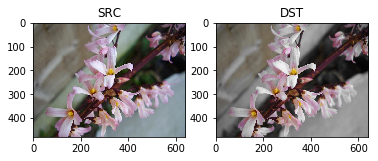

In [28]:
plt.subplot(121)
plt.imshow(src)
plt.title('SRC')
plt.subplot(122)
plt.imshow(dst)
plt.title('DST')

参考：
[1]. https://blog.csdn.net/trent1985/article/details/45193487